# ANÁLISE DE DADOS

## BIBLIOTECAS E CONFIGURAÇÕES

In [1]:
import pandas                 as pd
import numpy                  as np
import matplotlib.pyplot      as plt
import seaborn                as sns

In [2]:
sns.set_style('darkgrid')

## FUNÇÕES

In [3]:
# configura os eixos do gráfico
def axis_settings(x_label, y_label = ' ', fontsize = 12, x_rotation = 0, y_rotation = 0):
    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label, fontsize = fontsize)
    plt.xticks(fontsize = fontsize, rotation = x_rotation)
    plt.yticks(fontsize = fontsize, rotation = y_rotation)

## 1. OBTENÇÃO DOS DADOS

Os dados usados nessa análise são referentes ao ano de 2017 e foram obtidos a partir do site [Kaggle](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps?resource=download&sort=votes).

In [176]:
# leitura do arquivo
df = pd.read_csv('AppleStore.csv')

## 2. DESCRIÇÃO DOS DADOS

### 2.1. Dicionário de variáveis

- **id**: identificados do aplicativo;
- **track_name**: nome do aplicativo;
- **size_bytes**: tamanho (em bytes);
- **currency**: tipo de moeda;
- **price**: preço;
- **rating_count_tot**: contagens de classificação do usuário (para todas as versões);
- **rating_count_ver**: contagens de classificação do usuário (para versão atual);
- **user_rating**: valor médio da classificação do usuário (para todas as versões);
- **user_rating_ver**: valor médio da classificação do usuário (para a versão atual);
- **ver**: código da versão mais recente;
- **cont_rating**: classificação do conteúdo;
- **prime_genre**: gênero principal;
- **sup_devices.num**: número de dispositivos de suporte;
- **ipadSc_urls.num**: número de capturas de tela exibidas para exibição;
- **lang.num**: número de idiomas suportados;
- **vpp_lic**: licenciamento baseado em dispositivo Vpp ativado.

### 2.2. Informações básicas

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


- O conjunto de dados possui 17 colunas e 7197 linhas;
- Não há dados faltantes;
- Não há nenhum dado que necessita uma mudança de tipo.

### 2.3. Estatítica básica

In [178]:
df.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


- Há aplicativos gratuitos;
- Há aplicativos com avaliação igual a zero;
- Há aplicativos que não foram avaliados por nenhum usuário (aqui eu entendo como aplicativo sem usuários);
- Há aplicativos sem suporte a idiomas.

## 3. LIMPEZA DOS DADOS

### 3.1. Registros duplicados

In [179]:
# verifica se há registros duplicados
df[df['track_name'].duplicated(False) == True]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3319,4000,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
5603,7579,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1
7092,10751,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
7128,10885,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


Há registros duplicados, portanto, é necessário removê-los e manter apenas um registro por aplicativo. 


O critério a ser utilizado para a remoção das linhas duplicadas é manter o registro mais atualizado. Uma coluna que mostra qual linha refere-se a versões mais atuais é a `ver` e a `rating_count_tot`. Iremos utilizar a segunda por ser do tipo inteiro.

In [180]:
# ordena os dados de maneira descendente e exclui os registros duplicados mais antigos
df = df.sort_values(by = 'rating_count_tot', ascending = False).drop_duplicates('track_name', keep = 'first')

# reorganiza os índices
df = df.reset_index(drop = True)

### 3.2. Avaliações iguais a zero

In [181]:
# avaliações
df['user_rating'].unique()

array([3.5, 4.5, 4. , 3. , 5. , 2.5, 2. , 1.5, 1. , 0. ])

In [182]:
# remoção dos aplicativos que possuem avaliações iguais a zero
df = df.loc[(df['user_rating'] != 0)]

### 3.3. Quantidade de avaliações 

Eu irei analisar apenas os aplicativos que tiverem ao menos 10 avaliações.

In [183]:
# remoção dos aplicativos que possuem menos de 10 avaliações
df = df.loc[(df['rating_count_tot'] >= 10)]

### 3.4. Suporte a nenhuma linguagem

Na base de dados consta que há alguns aplicativos que não suportem nenhum idioma, o que é estranho pois se espera que ao menos um idioma o aplicativo possua para passar algumas informações básicas ao usuário. Aplicativos que não suportam nenhum idioma serão retirados da base.

In [184]:
df = df.loc[(df['lang.num'] != 0)].reset_index(drop = True)

### 3.5. Seleção de colunas

In [185]:
# remove algumas colunas
df.drop(['Unnamed: 0', 'id','currency','ver','sup_devices.num','ipadSc_urls.num','vpp_lic'], axis = 1, inplace = True)

## 4. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

### 4.1. Quais são as categorias com o maior número de aplicativos?

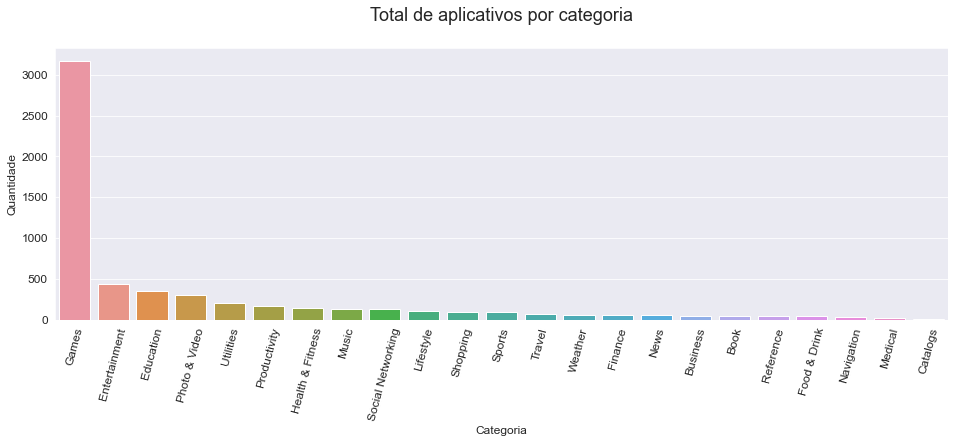

In [186]:
plt.figure(figsize = (16, 5))
sns.countplot(data = df, x = 'prime_genre', order = df['prime_genre'].value_counts().index)
axis_settings('Categoria', 'Quantidade', x_rotation = 75)
plt.title('Total de aplicativos por categoria\n', size = 18)
plt.show()

As cinco categorias mais populares são:
- Games: 54.3%;
- Entertainment: 7.6%;
- Education: 6%;
- Photo & Video: 5.3%;
- Utilities: 3.5%.


As outras categorias correspondem a 23.3% da base.

### 4.2. Qual é a distribuição dos preços dos aplicativos?

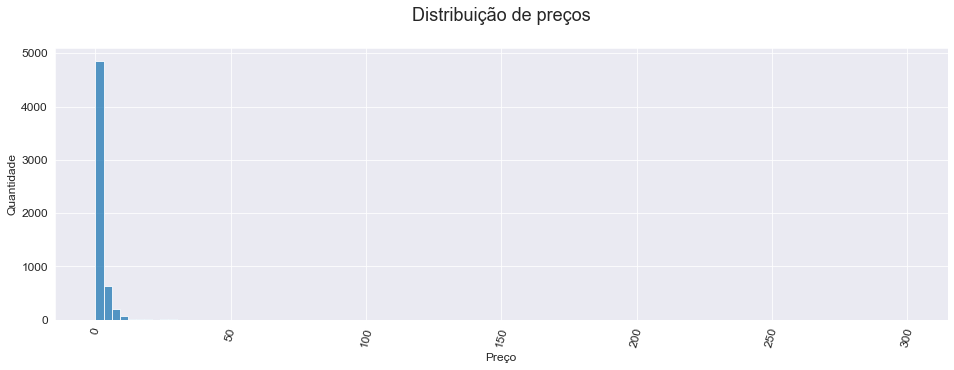

In [198]:
plt.figure(figsize = (16, 5))
sns.histplot(data = df, x = 'price', bins = 100)
axis_settings('Preço', 'Quantidade', x_rotation = 75)
plt.title('Distribuição de preços\n', size = 18)
plt.show()

A partir do gráfico acima, é possível notar que a grande maioria dos aplicativos são distribuídos gratuitamente ou com preços inferiores 10 dólares (que correspondem a 98.7% da base). 

### 4.3. A loja tem mais aplicativos pagos ou gratuitos?

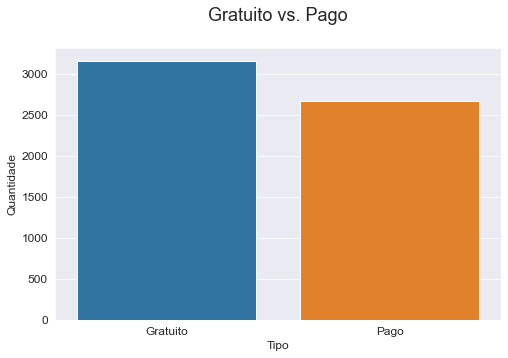

In [202]:
aux = df['price'].apply(lambda x: 'Gratuito' if x == 0 else 'Pago')

plt.figure(figsize = (8, 5))
sns.countplot(x = aux)
axis_settings('Tipo', 'Quantidade')
plt.title('Gratuito vs. Pago\n', fontsize = 18)
plt.show()

A maior parte dos aplicativos são oferecidos gratuitamente. 


Mas como que aplicativos gratuitos geram receita? Bom, resumidamente há muitos aplicativos que oferecem uma versão gratuita e depois cobram por novas funcionalidades, além de também darem espaço para publicidade. Este [link](https://bloomidea.com/blog/5-modelos-de-negocio-para-apps) explica melhor os cinco modelos de negócio mais utilizados.

### 4.4. Quais são os 5 aplicativos mais utilizados?

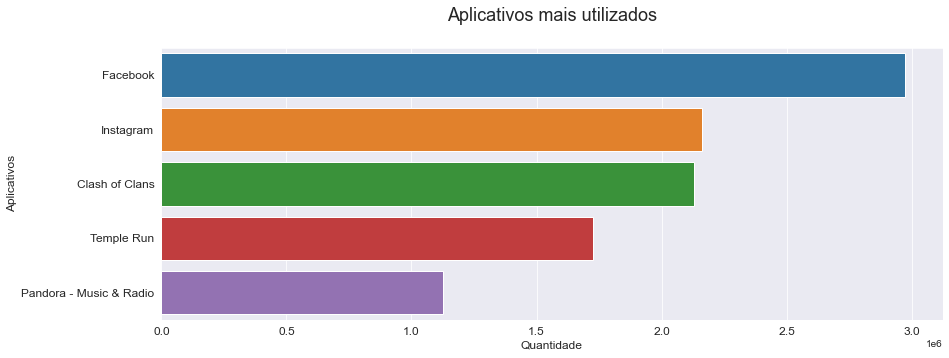

In [203]:
# seleciona os cinco aplicativos com mais avaliações
aux = df.sort_values(by = 'rating_count_tot', ascending = False).head(5)

# gráfico
plt.figure(figsize = (14, 5))
sns.barplot(data = aux, x = 'rating_count_tot', y = 'track_name')
axis_settings('Quantidade', 'Aplicativos')
plt.title('Aplicativos mais utilizados\n', fontsize = 18)
plt.show()

### 4.5. Quais são os 5 aplicativos menos utilizados?

In [204]:
# aplicativos com a quantidade de avaliações mínimas (iguais a 10)
df[df['rating_count_tot'] == 10].shape[0]

36

Não foi possível buscar os cinco aplicativos menos utilizados, pois há 36 com o quantidade mínima de avaliações (estipulada no problema de negócio). A tabela abaixo mostra as informações desses 36 aplicativos.

In [205]:
# aplicativos
df[df['rating_count_tot'] == 10]

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,lang.num
5801,Risky Rooms,24167424,0.00,10,1,3.5,5.0,4+,Games,1
5802,The Collider 2,420882432,1.99,10,10,2.0,2.0,4+,Games,1
5803,The Lorax - Read & Play - Dr. Seuss,91570176,3.99,10,10,4.5,4.5,4+,Book,1
5804,大根にしがみつく女子高生,93810688,0.00,10,7,5.0,5.0,9+,Games,1
5805,Elf Pets® Pup — The Elf on the Shelf®,469178368,0.99,10,3,4.5,5.0,4+,Games,1
5806,WikiCamps Australia,23020544,4.99,10,0,4.5,0.0,4+,Travel,1
5807,unWorded,350912512,3.99,10,10,4.0,4.0,9+,Games,1
5808,My8to18,10645504,0.00,10,0,1.0,0.0,4+,Sports,9
5809,Read with Doc: Word Building,950553600,2.99,10,3,4.0,3.5,4+,Education,1
5810,カロリー管理（痩せるアプリ）,44402688,3.99,10,0,4.5,0.0,17+,Health & Fitness,1


### 4.6. Qual é a distribuição das notas?

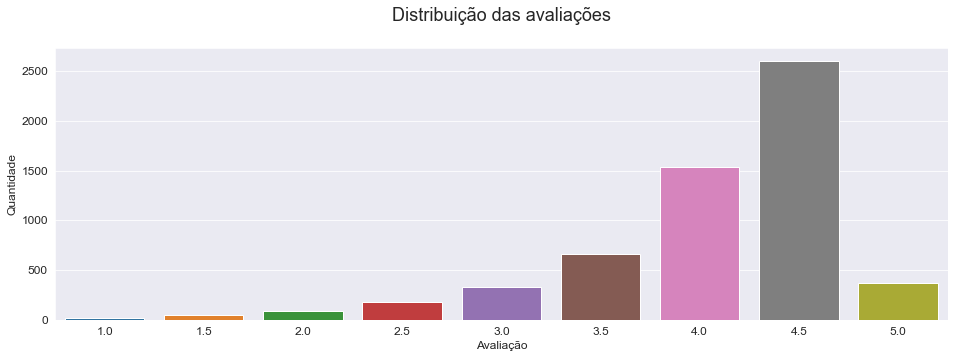

In [206]:
plt.figure(figsize = (16, 5))
sns.countplot(data = df, x = 'user_rating')
axis_settings('Avaliação', 'Quantidade')
plt.title('Distribuição das avaliações\n', fontsize = 18)
plt.show()

A maior parte dos aplicativos possuem avaliação média entre 3.5 e 4.5 (que correspondem a 82.4% da base).

### 4.7. Quais são as categorias mais bem avaliadas?

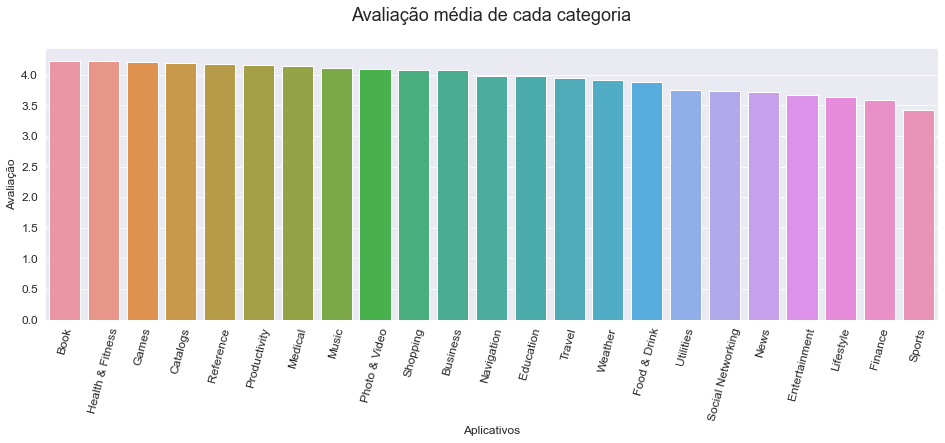

In [207]:
aux = df.groupby(by = 'prime_genre').mean().reset_index()[['prime_genre', 'user_rating']].sort_values(by = 'user_rating', ascending = False)

# gráfico
plt.figure(figsize = (16, 5))
sns.barplot(data = aux, x = 'prime_genre', y = 'user_rating')
axis_settings('Aplicativos', 'Avaliação', x_rotation = 75)
plt.title('Avaliação média de cada categoria\n', fontsize = 18)
plt.show()

As cinco categorias que possuem as maiores avaliações médias são:

In [209]:
aux.reset_index(drop = True)[0:5]

,prime_genre,user_rating
0,Book,4.230000
1,Health & Fitness,4.228188
2,Games,4.206402
3,Catalogs,4.200000
4,Reference,4.173469


### 4.8. Quais são as categorias com as piores avaliações

O gráfico do item 4.7 mostra as avaliações médias de todas as categorias, incluindo as com as piores avaliações, as quais são: 

In [210]:
aux.reset_index(drop = True)[-5:]

,prime_genre,user_rating
18,News,3.725000
19,Entertainment,3.677201
20,Lifestyle,3.632353
21,Finance,3.590164
22,Sports,3.421053


### 4.9. Os aplicativos são direcionados para quais faixa etárias?

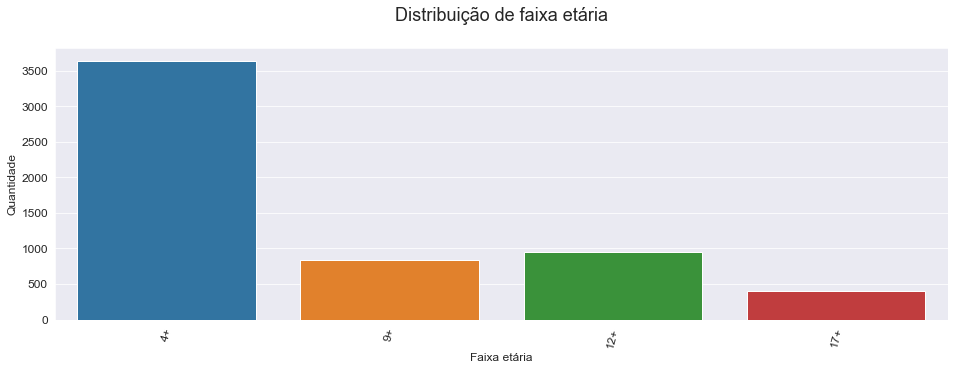

In [211]:
# ordem
order = ['4+', '9+', '12+', '17+']

# gráfico
plt.figure(figsize = (16, 5))
sns.countplot(data = df, x = 'cont_rating', order = order)
axis_settings('Faixa etária', 'Quantidade', x_rotation = 75)
plt.title('Distribuição de faixa etária\n', fontsize = 18)
plt.show()

Cerca de 62.4% dos aplicativos possuem classificação a partir dos 4 anos.

### 4.10. Aplicativos com disponíveis para vários idiomas costumam serem mais bem avaliados?

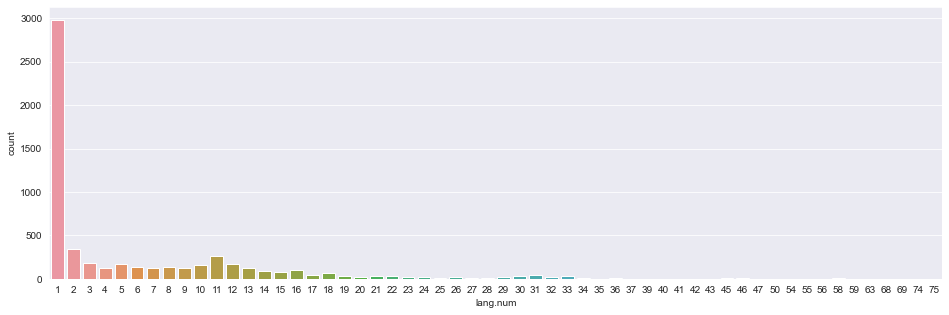

In [212]:
# gráfico
plt.figure(figsize = (16, 5))
sns.countplot(data = df, x = 'lang.num')
#axis_settings('Faixa etária', 'Quantidade', x_rotation = 75)
#plt.title('Distribuição de faixa etária\n', fontsize = 18)
plt.show()

- Cerca de 51.1% dos aplicativos suportam apenas um idioma;
- Aproximadamente 6.1% dos aplicativos suportam mais de 20 indiomas.